# Codecademy [NBA Trends Project](https://www.codecademy.com/projects/practice/nba-trends)

*Analyze National Basketball Association (NBA) data to look at associations between teams, win-rates, playoff appearances, and more.*

In this project, you'll analyze data from the NBA (National Basketball Association) and explore possible associations. 

This data was originally sourced from 538's Analysis of the [Complete History Of The NBA](http://fivethirtyeight.com/interactives/the-complete-history-of-every-nba-team-by-elo) and contains the original, unmodified data from [Basketball Reference](http://www.basketball-reference.com/) as well as several additional variables 538 added to perform their own analysis. 

You can read more about the data and how it's being used by 538 [here](https://github.com/fivethirtyeight/data/tree/master/nba-elo). For this project we've limited the data to just 5 teams and 10 columns (plus one constructed column, `point_diff`, the difference between `pts` and `opp_pts`).

You will create several charts and tables in this project, so you'll need to use `plt.clf()` between plots in your code so that the plots don't layer on top of one another.


In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#to make the output look nicer
np.set_printoptions(suppress=True, precision = 2)

In [4]:
nba = pd.read_csv('./nba_games.csv')
nba.head(10)

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
0,194611010TRH,1947,Knicks,Huskies,A,0,68,66,W,0.359935,2
1,194611020CHS,1947,Knicks,Stags,A,0,47,63,L,0.368899,-16
2,194611020PRO,1947,Celtics,Steamrollers,A,0,53,59,L,0.359935,-6
3,194611050BOS,1947,Celtics,Stags,H,0,55,57,L,0.620204,-2
4,194611070STB,1947,Knicks,Bombers,A,0,68,63,W,0.339290,5
5,194611090DTF,1947,Celtics,Falcons,A,0,46,69,L,0.386818,-23
6,194611110NYK,1947,Knicks,Stags,H,0,68,78,L,0.629479,-10
7,194611130CHS,1947,Celtics,Stags,A,0,61,71,L,0.291740,-10
8,194611140STB,1947,Celtics,Bombers,A,0,62,64,L,0.313890,-2
9,194611160BOS,1947,Celtics,Huskies,H,0,53,49,W,0.602702,4


In [5]:
# Subset Data to 2010 Season, 2014 Season
nba_2010 = nba[nba.year_id == 2010]
nba_2014 = nba[nba.year_id == 2014]

In [6]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24359 entries, 0 to 24358
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   game_id        24359 non-null  object 
 1   year_id        24359 non-null  int64  
 2   fran_id        24359 non-null  object 
 3   opp_fran       24359 non-null  object 
 4   game_location  24359 non-null  object 
 5   is_playoffs    24359 non-null  int64  
 6   pts            24359 non-null  int64  
 7   opp_pts        24359 non-null  int64  
 8   game_result    24359 non-null  object 
 9   forecast       24359 non-null  float64
 10  point_diff     24359 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 2.0+ MB


### Task 1
The data has been subset for you into two smaller datasets: games from 2010 (named nba_2010) and games from 2014 (named nba_2014). To start, let’s focus on the 2010 data.

Suppose you want to compare the knicks to the nets with respect to points earned per game. Using the pts column from the nba_2010 DataFrame, create two series named knicks_pts (fran_id = "Knicks") and nets_pts(fran_id = "Nets") that represent the points each team has scored in their games.


In [7]:
knicks_pts = nba_2010[nba_2010.fran_id == "Knicks"]
knicks_pts.head(10)

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
21719,200910280MIA,2010,Knicks,Heat,A,0,93,115,L,0.258755,-22
21725,200910300CHA,2010,Knicks,Hornets,A,0,100,102,L,0.299804,-2
21728,200910310NYK,2010,Knicks,Sixers,H,0,127,141,L,0.540618,-14
21734,200911020NYK,2010,Knicks,Pelicans,H,0,117,111,W,0.533563,6
21739,200911040NYK,2010,Knicks,Pacers,H,0,89,101,L,0.566662,-12
21743,200911060NYK,2010,Knicks,Cavaliers,H,0,91,100,L,0.280335,-9
21746,200911070MIL,2010,Knicks,Bucks,A,0,87,102,L,0.266321,-15
21750,200911090NYK,2010,Knicks,Jazz,H,0,93,95,L,0.461508,-2
21756,200911110NYK,2010,Knicks,Hawks,H,0,101,114,L,0.411023,-13
21759,200911130NYK,2010,Knicks,Warriors,H,0,107,121,L,0.606775,-14


In [8]:
nets_pts = nba_2010[nba_2010.fran_id == "Nets"]
nets_pts.head(10)

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
21720,200910280MIN,2010,Nets,Timberwolves,A,0,93,95,L,0.475155,-2
21727,200910300NJN,2010,Nets,Magic,H,0,85,95,L,0.378323,-10
21730,200910310WAS,2010,Nets,Wizards,A,0,104,123,L,0.440620,-19
21733,200911020CHA,2010,Nets,Hornets,A,0,68,79,L,0.313346,-11
21738,200911040NJN,2010,Nets,Nuggets,H,0,94,122,L,0.325953,-28
21744,200911060PHI,2010,Nets,Sixers,A,0,94,97,L,0.270533,-3
21747,200911070NJN,2010,Nets,Celtics,H,0,76,86,L,0.302307,-10
21755,200911110NJN,2010,Nets,Sixers,H,0,79,82,L,0.541969,-3
21760,200911130ORL,2010,Nets,Magic,A,0,72,88,L,0.136111,-16
21762,200911140MIA,2010,Nets,Heat,A,0,80,81,L,0.196305,-1


In [9]:
print(len(knicks_pts))
print(len(nets_pts))

82
82


### Task 2

Calculate the difference between the two teams’ average points scored and save the result as diff_means_2010. Based on this value, do you think fran_id and pts are associated? Why or why not?


In [10]:
diff_mean_2010 = knicks_pts.pts.mean() - nets_pts.pts.mean()
diff_mean_2010

9.731707317073173

### Task 3
Rather than comparing means, it’s useful look at the full distribution of values to understand whether a difference in means is meaningful. Create a set of overlapping histograms that can be used to compare the points scored for the Knicks compared to the Nets. Use the series you created in the previous step (1) and the code below to create the plot. Do the distributions appear to be the same?


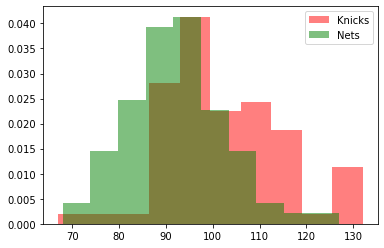

In [23]:
plt.hist(knicks_pts.pts, color="red", label="Knicks", alpha=0.5, density=True)
plt.hist(nets_pts.pts, color="green", label="Nets", alpha=0.5, density=True)
plt.legend()
plt.show()

### Task 4
Now, let’s compare the 2010 games to 2014. Replicate the steps from Tasks 2 and 3 using `nba_2014`. First, calculate the mean difference between the two teams points scored. Save and print the value as `diff_means_2014`. Did the difference in points get larger or smaller in 2014? Then, plot the overlapping histograms. Does the mean difference you calculated make sense?


In [21]:
knicks_pts_2014 = nba_2014[nba_2014.fran_id == "Knicks"]
netss_pts_2014 = nba_2014[nba_2014.fran_id == "Nets"]

diff_mean_2014 = knicks_pts_2014.pts.mean() - netss_pts_2014.pts.mean()
diff_mean_2014

0.44706798131809933

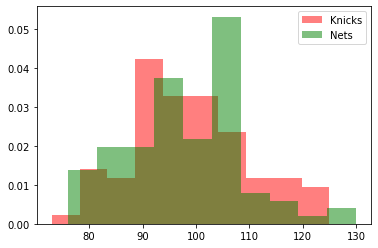

In [24]:
plt.hist(knicks_pts_2014.pts, color="red", label="Knicks", alpha=0.5, density=True)
plt.hist(netss_pts_2014.pts, color="green", label="Nets", alpha=0.5, density=True)
plt.legend()
plt.show()

### Task 5
For the remainder of this project, we’ll focus on data from 2010. Let’s now include all teams in the dataset and investigate the relationship between franchise and points scored per game.

Using nba_2010, generate side-by-side boxplots with points scored (pts) on the y-axis and team (fran_id) on the x-axis. Is there any overlap between the boxes? Does this chart suggest that fran_id and pts are associated? Which pairs of teams, if any, earn different average scores per game?


<AxesSubplot:xlabel='fran_id', ylabel='pts'>

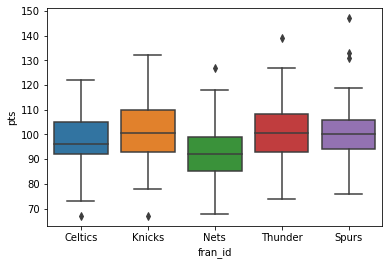

In [26]:
sns.boxplot(data=nba_2010, x="fran_id", y="pts")

### Task 6
We'd like to know if teams tend to win more games at home compared to away.

The variable, `game_result`, indicates whether a team won a particular game ('W' stands for “win” and 'L' stands for “loss”). The variable, `game_location`, indicates whether a team was playing at home or away ('H' stands for “home” and 'A' stands for “away”). 

Data scientists will often calculate a contingency table of frequencies to help them determine if categorical variables are associated. Calculate a table of frequencies that shows the counts of game_result and game_location.

Save your result as `location_result_freq` and print your result. Based on this table, do you think the variables are associated?`


In [27]:
location_result_freq = pd.crosstab(nba_2010.game_result, nba_2010.game_location)
location_result_freq

game_location,A,H
game_result,,
L,133,105
W,92,120


### Task 7

Convert this table of frequencies to a table of proportions and save the result as `location_result_proportions`.

In [28]:
location_result_proportions = location_result_freq / len(nba_2010)
location_result_proportions

game_location,A,H
game_result,,
L,0.295556,0.233333
W,0.204444,0.266667


### Task 8
Using the contingency table created above (Task 6), calculate the expected contingency table (if there were no association) and the Chi-Square statistic.

Does the actual contingency table look similar to the expected table — or different? Based on this output, do you think there is an association between these variables?


In [29]:
chi2, pval, dof, expected = chi2_contingency(location_result_freq)
expected

array([[119., 119.],
       [106., 106.]])

*For a 2x2 table, Chi-squared greater than about 4 indicates an association. We're not there*

In [31]:
chi2
# seems like the variables are associated

6.501704455367053

### Task 9

For each game, 538 has calculated the probability that each team will win the game. We want to know if teams with a higher probability of winning (according to 538) also tend to win games by more points. 

In the data, 538's prediction is saved as `forecast`. The `point_diff` column gives the margin of victory/defeat for each team (positive values mean that the team won; negative values mean that they lost). 

Using `nba_2010`, calculate the covariance between `forecast` (538's projected win probability) and `point_diff` (the margin of victory/defeat) in the dataset. Save and print your result. Looking at the matrix, what is the covariance between these two variables?


In [34]:
nba_2010.cov()

,year_id,is_playoffs,pts,opp_pts,forecast,point_diff
year_id,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
is_playoffs,0.0,0.081168,-0.396684,-0.452809,-0.002241,0.056125
pts,0.0,-0.396684,140.209973,48.939149,0.755659,91.270824
opp_pts,0.0,-0.452809,48.939149,144.227612,-0.618954,-95.288463
forecast,0.0,-0.002241,0.755659,-0.618954,0.052267,1.374613
point_diff,0.0,0.056125,91.270824,-95.288463,1.374613,186.559287


### Task 10

Because 538’s forecast variable is reported as a probability (not a binary), we can calculate the strength of the correlation.

Using nba_2010, calculate the correlation between `forecast` and `point_diff`. Call this `point_diff_forecast_corr`. Save and print your result. Does this value suggest an association between the two variables?


In [36]:
corr, p = pearsonr(nba_2010.forecast, nba_2010.point_diff)
corr

0.4402088708468084

### Task 11

Generate a scatter plot of `forecast` (on the x-axis) and `point_diff` (on the y-axis). Does the correlation value make sense?

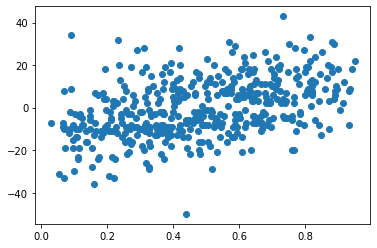

In [37]:
plt.scatter(nba_2010.forecast, nba_2010.point_diff)

In [ ]:
# mildly correlated